<a href="https://colab.research.google.com/github/Ashraf-Saleh/Fault-Detect/blob/Trial-branch/Fault_Detect.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# New Section

In [1]:
import numpy
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import keras 
from keras import layers
from keras.models import Sequential
from keras.layers.convolutional import Conv1D, MaxPooling1D
from keras.layers.convolutional import Conv2D, MaxPooling2D, AveragePooling2D
from keras.optimizers import SGD
from keras.layers import Dense, Flatten, Dropout, Activation, BatchNormalization,Concatenate, merge
from keras.utils.np_utils import to_categorical
from keras.models import model_from_json
from keras.utils import plot_model
import tensorflow as tf
import random, os
import multiprocessing as mp
from queue import Empty
import time

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
Data_X = numpy.load("/content/drive/My Drive/Colab_Data/Fault_Detect/Train_X_Sample.npy",None,allow_pickle=True)
Data_Y = numpy.load("/content/drive/My Drive/Colab_Data/Fault_Detect/Train_Y_Sample.npy",None,allow_pickle=True)

In [6]:
#Train_X = Data_X
#Train_Y = Data_Y
Train_X = Data_X[:int(len(Data_X)*0.7)]
Train_Y = Data_Y[:int(len(Data_Y)*0.7)]
#Vald_X = Data_X[int(len(Data_X)*0.4):int(len(Data_X)*0.7)]
#Vald_Y = Data_Y[int(len(Data_Y)*0.4):int(len(Data_Y)*0.7)]
Test_X = Data_X[int(len(Data_X)*0.7):]
Test_Y = Data_Y[int(len(Data_Y)*0.7):]
 
print(Data_X.shape)
print(Train_X.shape)
#print(Vald_X.shape)
print(Test_X.shape)

print(Data_Y.shape)
print(Train_Y.shape)
#print(Vald_Y.shape)
print(Test_Y.shape)

print(Data_X.shape)
print(Data_Y.shape)
print(Data_X[:10])
print(Data_Y[:10].astype('int'))

(22950, 5, 5000, 1)
(16064, 5, 5000, 1)
(6886, 5, 5000, 1)
(22950, 9)
(16064, 9)
(6886, 9)
(22950, 5, 5000, 1)
(22950, 9)
[[[[ 0.13094077]
   [ 0.13426788]
   [ 0.13725989]
   ...
   [ 0.29248513]
   [ 0.29248513]
   [ 0.29248513]]

  [[ 0.1185824 ]
   [ 0.12181842]
   [ 0.12472851]
   ...
   [ 0.2930481 ]
   [ 0.2930481 ]
   [ 0.2930481 ]]

  [[ 0.06765384]
   [ 0.06765384]
   [ 0.06765384]
   ...
   [ 0.0653845 ]
   [ 0.0653845 ]
   [ 0.0653845 ]]

  [[ 0.10997413]
   [ 0.10997413]
   [ 0.10997413]
   ...
   [ 0.05445085]
   [ 0.05445085]
   [ 0.05445085]]

  [[ 0.31572279]
   [ 0.30807951]
   [ 0.29945085]
   ...
   [ 0.20175829]
   [ 0.20368338]
   [ 0.20553999]]]


 [[[ 0.09996753]
   [ 0.09996753]
   [ 0.09996753]
   ...
   [ 0.1853474 ]
   [ 0.1897277 ]
   [ 0.19018248]]

  [[ 0.09835145]
   [ 0.09877051]
   [ 0.10244886]
   ...
   [ 0.22707055]
   [ 0.22707055]
   [ 0.22707055]]

  [[ 0.12270904]
   [ 0.12426921]
   [ 0.12554571]
   ...
   [ 0.13322839]
   [ 0.13594687]
   [ 0.

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
data (InputLayer)               [(None, 5, 5000, 1)] 0                                            
__________________________________________________________________________________________________
conv2d_5 (Conv2D)               (None, 4, 2498, 50)  550         data[0][0]                       
__________________________________________________________________________________________________
conv2d_6 (Conv2D)               (None, 4, 1247, 50)  12550       conv2d_5[0][0]                   
__________________________________________________________________________________________________
batch_normalization_10 (BatchNo (None, 4, 1247, 50)  200         conv2d_6[0][0]                   
______________________________________________________________________________________________

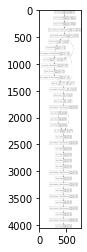

In [8]:
inputs = keras.Input(shape = (Train_X.shape[1], Train_X.shape[2], Train_X.shape[3]), name="data")
 
x = layers.Conv2D(filters = 50, kernel_size = (2, 5),strides=(1, 2), activation = "relu") (inputs)
x = layers.Conv2D(filters = 50, kernel_size = (1, 5),strides=(1, 2), activation = "relu") (x)
x = layers.BatchNormalization()(x)
block_1_output = layers.MaxPooling2D(pool_size = (1,100)) (x)

x = layers.Conv2D(filters = 50, kernel_size = (1,5),strides = (1, 2),padding = 'valid', activation='relu') (block_1_output)
x = layers.Conv2D(filters = 50, kernel_size = (1,4),strides = (1, 2),padding = 'valid', activation='relu') (x)
x = layers.BatchNormalization()(x)
block_3_output = layers.add([x, block_1_output])
block_2_output = layers.MaxPooling2D(pool_size = (1,8)) (block_3_output)

x = layers.Conv2D(filters = 50,kernel_size= (1, 1),strides = (1, 2), activation="relu")(block_2_output)
x = layers.BatchNormalization()(x)
block_4_output = layers.add([x, block_1_output])
x = layers.MaxPooling2D(pool_size = (1,1))(block_4_output)

#x = layers.Conv2D(filters = 50,kernel_size= (1, 10),strides = (1, 2), activation="relu")(x)

#x = layers.AveragePooling2D(pool_size = (1,4))(x)
#x = layers.Conv2D(filters = 25,kernel_size= (1, 10),strides = (1, 1), activation="relu")(x)
#x = layers.AveragePooling2D(pool_size = (1,4))(x)

'''
x = layers.Conv2D(filters = 21, kernel_size = (3, 100), activation='relu') (inputs)
block_1_output = layers.MaxPooling2D(pool_size = (1,4)) (x)
 
x = layers.Conv2D(filters = 11, kernel_size = (2, 200), activation="relu", padding="same")(block_1_output)
x = layers.Conv2D(filters = 21, kernel_size = (2, 20), activation="relu", padding="same")(x)
block_2_output = layers.add([x, block_1_output])
 
 
x = layers.Conv2D(filters = 21,kernel_size= (1, 50), activation="relu", padding="same")(block_2_output)
x = layers.Conv2D(filters = 21,kernel_size= (1, 70), activation="relu", padding="same")(x)
block_3_output = layers.add([x, block_2_output])
 
 
x = layers.Conv2D(filters = 11, kernel_size = (2, 20), activation="relu", padding="same")(block_3_output)
x = layers.Conv2D(filters = 21, kernel_size = (2, 20), activation="relu", padding="same")(x)
 
block_6_output = layers.add([x, block_3_output])
 
x = layers.Conv2D(filters = 21,kernel_size= (1, 20), activation="relu", padding="same")(block_6_output)
x = layers.Conv2D(filters = 21,kernel_size= (1, 20), activation="relu", padding="same")(x)
block_7_output = layers.add([x, block_6_output])
 
x = layers.MaxPooling2D(pool_size = (1,4)) (block_7_output) 
 '''
x = layers.Flatten()(x) 
 
 
x = layers.Dense(64, activation="relu")(x)
#x = layers.BatchNormalization()(x)
block_5_output = layers.BatchNormalization()(x)
x = layers.Dense(64, activation="relu")(block_5_output)
x = layers.Dense(64, activation="relu")(x)
x = layers.Dense(64, activation="relu")(x)
block_6_output = layers.add([x, block_5_output])
x = layers.Dense(58, activation="relu")(block_6_output)
x = layers.BatchNormalization()(x)
x = layers.Dense(52, activation="relu")(x)
x = layers.Dense(52, activation="relu")(x)
x = layers.Dense(52, activation="relu")(x)
x = layers.Dense(52, activation="relu")(x)
x = layers.BatchNormalization()(x)
x = layers.Dense(46, activation="relu")(x)
x = layers.BatchNormalization()(x)
x = layers.Dense(40, activation="relu")(x)
x = layers.BatchNormalization()(x)
x = layers.Dense(32, activation="relu")(x)
block_7_output = layers.BatchNormalization()(x)
#x = layers.Dense(28, activation="relu")(x)
#x = layers.Dense(22, activation="relu")(x)
#block_4_output = layers.Dense(16, activation="relu")(x)
x = layers.Dense(32, activation="relu")(x)
x = layers.Dense(32, activation="relu")(x)
 
#x = layers.Dense(16, activation="relu")(block_4_output)
#x = layers.Dense(16, activation="relu")(x)
block_8_output = layers.add([x, block_7_output])
x = layers.Dense(16, activation="relu")(block_7_output)
x = layers.BatchNormalization()(x)
#block_5_output = layers.add([x, block_4_output])
 
#x = block_5_output
#x = layers.Dropout(0.5)(x)
outputs = layers.Dense(Train_Y.shape[1], activation='softmax')(x)
 
 
model = keras.Model(inputs, outputs, name="model")
 
model.compile(optimizer='adam', loss='CategoricalCrossentropy', metrics=['accuracy'])
 
model.summary()
plot_model(model, to_file='/content/drive/My Drive/Colab_Data/Fault_Detect/model.png',show_shapes=True)
plt.imshow(mpimg.imread('/content/drive/My Drive/Colab_Data/Fault_Detect/model.png'))

In [9]:
history = model.fit(Train_X, Train_Y, epochs=1000,batch_size = 50, verbose=2)#, validation_data=(Vald_X,Vald_Y))

Epoch 1/1000
322/322 - 6s - loss: 0.7463 - accuracy: 0.6702
Epoch 2/1000
322/322 - 6s - loss: 0.4076 - accuracy: 0.8015
Epoch 3/1000
322/322 - 6s - loss: 0.3162 - accuracy: 0.8411
Epoch 4/1000
322/322 - 6s - loss: 0.3111 - accuracy: 0.8415
Epoch 5/1000
322/322 - 6s - loss: 0.2512 - accuracy: 0.8678
Epoch 6/1000
322/322 - 6s - loss: 0.2536 - accuracy: 0.8676
Epoch 7/1000
322/322 - 6s - loss: 0.2388 - accuracy: 0.8746
Epoch 8/1000
322/322 - 6s - loss: 0.2024 - accuracy: 0.8920
Epoch 9/1000
322/322 - 6s - loss: 0.2211 - accuracy: 0.8762
Epoch 10/1000
322/322 - 6s - loss: 0.2017 - accuracy: 0.8893
Epoch 11/1000
322/322 - 6s - loss: 0.1802 - accuracy: 0.9037
Epoch 12/1000
322/322 - 6s - loss: 0.1674 - accuracy: 0.9045
Epoch 13/1000
322/322 - 6s - loss: 0.1709 - accuracy: 0.9040
Epoch 14/1000
322/322 - 6s - loss: 0.1779 - accuracy: 0.8995
Epoch 15/1000
322/322 - 6s - loss: 0.1684 - accuracy: 0.9015
Epoch 16/1000
322/322 - 6s - loss: 0.1610 - accuracy: 0.9086
Epoch 17/1000
322/322 - 6s - loss

In [10]:
#Test_X,Test_Y = prepare_test_data()

#Test_Y_1 = to_categorical(Test_Y)
Train_Y_1 = to_categorical(Train_Y)
print(Test_X.shape)
print(Test_Y.shape)
print(to_categorical(Test_Y).shape)
print(Train_X.shape)
print(Train_Y.shape)
print(to_categorical(Train_Y).shape)

(6886, 5, 5000, 1)
(6886, 9)
(6886, 9, 2)
(16064, 5, 5000, 1)
(16064, 9)
(16064, 9, 2)


In [11]:
from numpy import argmax
from numpy import random
print ('Training   ', model.metrics_names,' = ',model.evaluate(Train_X, Train_Y, verbose=0))
#print ('Validation ', model.metrics_names,' = ',model.evaluate(Vald_X,  Vald_Y, verbose=0))
print ('Testing    ', model.metrics_names,' = ',model.evaluate(Test_X,  Test_Y, verbose=0))

print ('true (Test)     \n',argmax(Test_Y,axis=1))
print ('predicted (Test)\n',argmax(model.predict(Test_X), axis=1))

print ('true (Train)     \n',argmax(Train_Y[:10],axis=1))    
print ('predicted (Train)\n', argmax(model.predict(Train_X[:10]), axis=1))     #make random check: Test_X*0.0090, random.shuffle(Test_X), Test_X*random.random()*0.05            
#print (model.summary())
 
 
numpy.savetxt('/content/drive/My Drive/Colab_Data/Fault_Detect/Test_Data_Predict.csv',argmax(model.predict(Test_X), axis=1),delimiter=',')
numpy.savetxt('/content/drive/My Drive/Colab_Data/Fault_Detect/Test_Data_True.csv',argmax(Test_Y,axis=1),delimiter=',')

Training    ['loss', 'accuracy']  =  [0.03289683163166046, 0.9821962118148804]
Testing     ['loss', 'accuracy']  =  [0.03496566787362099, 0.9805402159690857]
true (Test)     
 [2 5 5 ... 6 0 8]
predicted (Test)
 [2 5 5 ... 6 0 8]
true (Train)     
 [7 7 4 8 1 6 1 4 2 3]
predicted (Train)
 [7 7 4 8 1 6 3 4 2 3]


dict_keys(['loss', 'accuracy'])


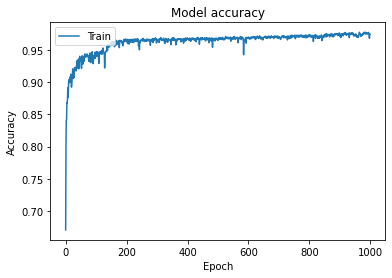

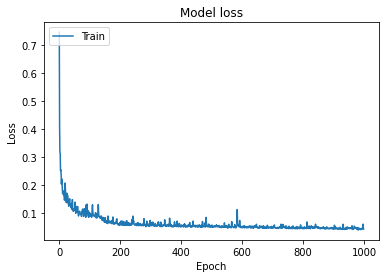

In [12]:
#Plot the model
 
plot_model(model, to_file='model.png', show_shapes = True, show_layer_names = True)
 
print(history.history.keys())
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
 
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [13]:

model.save('/content/drive/My Drive/Colab_Data/Fault_Detect/my_model.h5')
